In [12]:
import keras
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

### Training the convnet on MNIST images

In [15]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### compile and fit model 

In [17]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2033 - acc: 0.9362 - val_loss: 0.0697 - val_acc: 0.9798
Epoch 2/5
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0540 - acc: 0.9824 - val_loss: 0.0527 - val_acc: 0.9842
Epoch 3/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0359 - acc: 0.9891 - val_loss: 0.0490 - val_acc: 0.9855
Epoch 4/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0278 - acc: 0.9912 - val_loss: 0.0437 - val_acc: 0.9885
Epoch 5/5
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0409 - val_acc: 0.9877


#### evaluate model

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 305us/step


0.9899

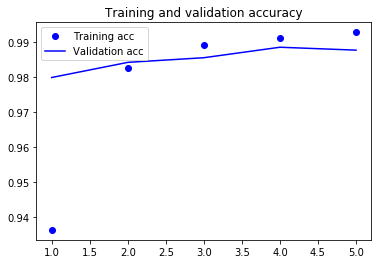

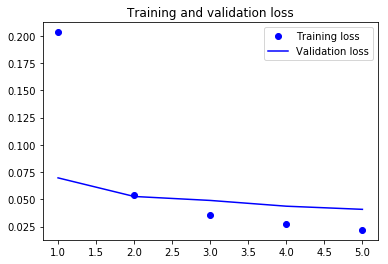

In [19]:
#import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

** Exercise:  **

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.

In [21]:
model_exercise = models.Sequential()
model_exercise.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model_exercise.add(layers.MaxPooling2D((2, 2)))
model_exercise.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model_exercise.add(layers.MaxPooling2D((2, 2)))
model_exercise.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
#model_exercise.summary()

In [22]:
model_exercise.add(layers.Flatten())
model_exercise.add(layers.Dense(64, activation='sigmoid'))
model_exercise.add(layers.Dense(10, activation='softmax'))
model_exercise.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                36928     
__________

In [23]:
model_exercise.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_exercise.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 52s 1ms/step - loss: 1.0787 - acc: 0.6497 - val_loss: 0.3313 - val_acc: 0.9026
Epoch 2/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2378 - acc: 0.9301 - val_loss: 0.1704 - val_acc: 0.9524
Epoch 3/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.1375 - acc: 0.9576 - val_loss: 0.1010 - val_acc: 0.9698
Epoch 4/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0974 - acc: 0.9701 - val_loss: 0.0785 - val_acc: 0.9760
Epoch 5/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0754 - acc: 0.9769 - val_loss: 0.0798 - val_acc: 0.9757


In [24]:

test_loss, test_acc =model_exercise.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 327us/step


0.9756

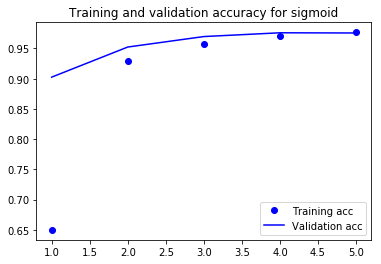

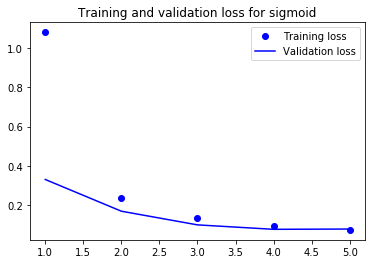

0.9756

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for sigmoid')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for sigmoid')
plt.legend()

plt.show()
test_acc

In [27]:
model_exercise.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_exercise.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0542 - acc: 0.9834 - val_loss: 0.0626 - val_acc: 0.9805
Epoch 2/5
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0518 - acc: 0.9841 - val_loss: 0.0615 - val_acc: 0.9806
Epoch 3/5
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0609 - val_acc: 0.9810
Epoch 4/5
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0605 - val_acc: 0.9812
Epoch 5/5
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0496 - acc: 0.9848 - val_loss: 0.0596 - val_acc: 0.9812


In [28]:

test_loss, test_acc =model_exercise.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 332us/step


0.9835

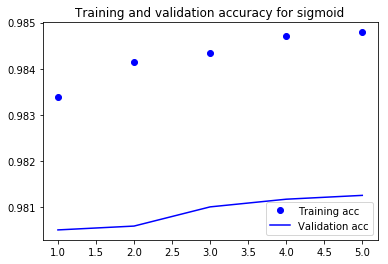

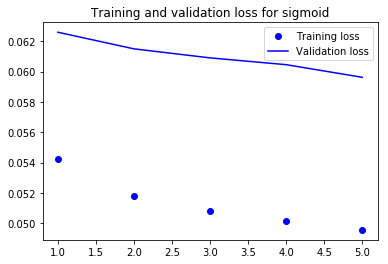

0.9835

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for sigmoid')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for sigmoid')
plt.legend()

plt.show()
test_acc

In [30]:
model_exercise.compile(optimizer= 'adagrad', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_exercise.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0608 - acc: 0.9813 - val_loss: 0.0600 - val_acc: 0.9822
Epoch 2/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0457 - acc: 0.9860 - val_loss: 0.0590 - val_acc: 0.9828
Epoch 3/5
48000/48000 [==============================] - 46s 967us/step - loss: 0.0419 - acc: 0.9876 - val_loss: 0.0527 - val_acc: 0.9835
Epoch 4/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0398 - acc: 0.9880 - val_loss: 0.0522 - val_acc: 0.9845
Epoch 5/5
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0375 - acc: 0.9889 - val_loss: 0.0511 - val_acc: 0.9850


In [31]:

test_loss, test_acc =model_exercise.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 337us/step


0.9872

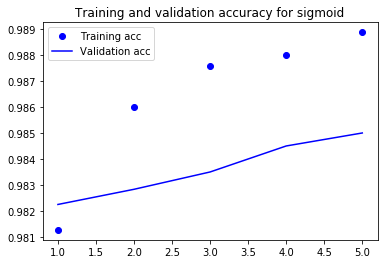

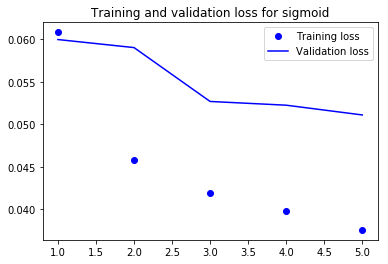

0.9872

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for sigmoid')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for sigmoid')
plt.legend()

plt.show()
test_acc